<a href="https://colab.research.google.com/github/jiashenyue/ca-wui-pop-increase/blob/main/analysis_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Preparation**

- Shenyue Jia | [jiashenyue.info](https://www.jiashenyue.info/)

##**0. Overview**

- Prepare the data to estimate the drivers of population increase inside California's Wildland-Urban Interface (WUI), a high-risk zone of wildfire during the past decade (2010-2019)

###**Data dictionary**

- [ ] data dictionary

##**1. Data preparation**

###**1.1 Data inspection**

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# inspect data
url = 'https://drive.google.com/file/d/13aOXzrxjMH7YH90vkxHyFQDm3OUGz_r7/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,geoid,county,trend,p_val,z_score,wui_class,owner_num,renter_num,annual_grow_rate,hai,...,whp_mean,whp_majority,whp_minority,whp_median,rps_mean,rps_median,rps_min,rps_max,rps_range,rent_own_ratio
0,6005000304,Amador County,increasing,0.001282,3.219938,Med_Dens_Interface,1289,390,0.80,141,...,3.660041,4,2,4,0.351582,0.374090,0.000000,0.793326,0.793326,0.303
1,6019005504,Fresno County,increasing,0.000347,3.577709,Low_Dens_Interface,957,148,3.65,124,...,1.000000,0,2,0,0.014541,0.010501,0.000000,0.071251,0.071251,0.155
2,6073010015,San Diego County,increasing,0.000677,3.398823,Med_Dens_Interface,765,207,3.98,96,...,2.349550,4,5,3,0.465186,0.272323,0.000000,1.221064,1.221064,0.271
3,6071008402,San Bernardino County,increasing,0.012266,2.504396,High_Dens_Interface,1910,411,0.44,147,...,0.000000,0,0,0,0.013819,0.000004,0.000000,0.598311,0.598311,0.215
4,6083000302,Santa Barbara County,decreasing,0.049098,-1.967740,High_Dens_Interface,415,1482,0.48,47,...,0.000000,0,0,0,0.000843,0.000320,0.000009,0.007597,0.007588,3.571


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   geoid                 1284 non-null   int64  
 1   county                1284 non-null   object 
 2   trend                 1284 non-null   object 
 3   p_val                 1284 non-null   float64
 4   z_score               1284 non-null   float64
 5   wui_class             1284 non-null   object 
 6   owner_num             1284 non-null   int64  
 7   renter_num            1284 non-null   int64  
 8   annual_grow_rate      1284 non-null   float64
 9   hai                   1284 non-null   int64  
 10  income_mortage_ratio  1284 non-null   float64
 11  diversity_index       1284 non-null   float64
 12  med_house_income      1284 non-null   int64  
 13  per_capita_income     1284 non-null   int64  
 14  med_home_value        1284 non-null   int64  
 15  annual_pop_change    

###**1.2 Target variable**

- **Option 1: use `z_score` column**
  - Coefficient of Mann-Kendall test, indicating how strong does the population change over the years relate to the time
- **Option 2: use `annual_grow_rate` column**
  - Annualized growing rate of population based on data from 2010 to 2019
- **Option 3: use `annual_pop_change` column**
  - Annualized number of population change based on data from 2010 to 2019
- **Option 4: use `percent_pop_change` column**
  - Annualized percentage of population change based on data from 2010 to 2019

- **We will try Option 1 first (`z_score`)**
- **Only focus on rows with `z_score > 0` and `p_val < 0.05`**

In [8]:
# filter data to z_score > 0 and p_value < 0.05
df_sig_increase = df[(df.z_score > 0) & (df.p_val < 0.05)]

In [22]:
# drop some target variable options
drops = ['annual_grow_rate','annual_pop_change','percent_pop_change','p_val']
df_sig_increase = df_sig_increase.drop(columns = drops)

In [23]:
# copy the original data and drop the first column for EDA
eda_df = df_sig_increase.copy()
eda_df.head()

,geoid,county,trend,z_score,wui_class,owner_num,renter_num,hai,income_mortage_ratio,diversity_index,...,whp_mean,whp_majority,whp_minority,whp_median,rps_mean,rps_median,rps_min,rps_max,rps_range,rent_own_ratio
0,6005000304,Amador County,increasing,3.219938,Med_Dens_Interface,1289,390,141,16.6,47.7,...,3.660041,4,2,4,0.351582,0.374090,0.0,0.793326,0.793326,0.303
1,6019005504,Fresno County,increasing,3.577709,Low_Dens_Interface,957,148,124,18.6,69.5,...,1.000000,0,2,0,0.014541,0.010501,0.0,0.071251,0.071251,0.155
2,6073010015,San Diego County,increasing,3.398823,Med_Dens_Interface,765,207,96,22.7,79.5,...,2.349550,4,5,3,0.465186,0.272323,0.0,1.221064,1.221064,0.271
3,6071008402,San Bernardino County,increasing,2.504396,High_Dens_Interface,1910,411,147,16.1,70.9,...,0.000000,0,0,0,0.013819,0.000004,0.0,0.598311,0.598311,0.215
5,6013351200,Contra Costa County,increasing,2.325511,Med_Dens_Interface,1986,123,87,27.5,37.2,...,2.295082,3,1,2,0.123490,0.115787,0.0,0.299861,0.299861,0.062


In [24]:
print(f'Dataframe for EDA contains {eda_df.shape[0]} rows and {eda_df.shape[1]} columns')

Dataframe for EDA contains 981 rows and 26 columns


###**1.3 `z_score` as target variable**

In [25]:
col_pal = sns.color_palette('ch:1, r=1.45, l=.55, d=.395')
sns.color_palette('ch:1, r=1.45, l=.55, d=.395')

[(0.6671663710599731, 0.4639092574784279, 0.6833040561641264),
 (0.5944173789675091, 0.44686386017287955, 0.6879305278194555),
 (0.5144550874917323, 0.43625614508356136, 0.6777000916906704),
 (0.43233632850755416, 0.42992767975608875, 0.650398471074648),
 (0.3628802845356828, 0.4258241550971552, 0.6122790235874231),
 (0.2906687062148282, 0.42024281322903345, 0.553950436871317)]

In [26]:
## further confirm the outlier with a histogram
def box_plot(df, column_name,
             fs=(8,4), file_name='',
             tit_lab='', x_lab='', y_lab='', 
             fmt='',
             hza='center', rot=0):    
    # Variables
    feature = df[column_name]
    mean = feature.mean()
    median = feature.median()
    # Plot
    fig, ax = plt.subplots(nrows=1, figsize=fs, facecolor='w')
    sns.boxplot(data=df, x=column_name, width=.35, color=col_pal[4], ax=ax,
                medianprops={'color':'k', 'linewidth':1.5},
                whiskerprops={'color':'k', 'linewidth':1.5},
                boxprops={'facecolor':col_pal[4], 
                          'edgecolor':'k', 'linewidth':1.5},
                capprops={'color':'k', 'linewidth':1.5},
                flierprops={'marker':'o', 'markersize':8, 
                            'markerfacecolor':col_pal[4], 
                            'markeredgecolor':'k'}); 
    # Title and labels
    plt.title(tit_lab, fontsize = 16, weight='bold')
    plt.xlabel(x_lab, fontsize = 12, weight='bold')
    plt.ylabel('', fontsize = 12, weight='bold')
    # String format
    if fmt != '':
        ax.xaxis.set_major_formatter(fmt)
    # Ticks
    plt.xticks(fontsize=10, weight='bold')
    plt.yticks(fontsize=10, weight='bold')
    # Face 
    ax.set_facecolor('w')
    # Spines
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    # Vertical lines
    ax.axvline(mean, color = 'magenta', linewidth=2, 
               label=f'Mean = {mean:,.2f}')
    ax.axvline(median, ls='dotted', color = 'darkmagenta',  linewidth=2, 
               label=f'Median = {median:,.2f}')
    # Grid
    plt.grid(axis = 'x', lw=.5, c='k', alpha=.25)
    # Display
    ax.legend();
    plt.tight_layout()
    plt.show;

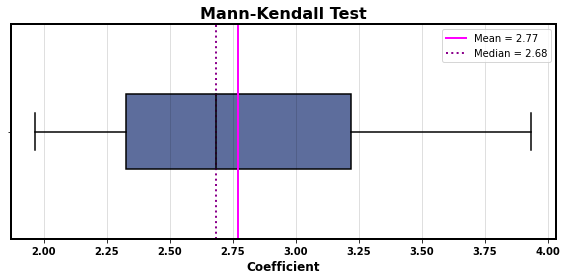

In [27]:
box_plot(eda_df, 'z_score',
             tit_lab='Mann-Kendall Test', 
             fs=(8,4),
         x_lab = 'Coefficient')

####**Findings**

- `z_score` column contains very few outliers
- No further treatment needed

In [28]:
# check max value
eda_df['z_score'].describe()

count    981.000000
mean       2.772589
std        0.546006
min        1.967740
25%        2.325511
50%        2.683282
75%        3.219938
max        3.935480
Name: z_score, dtype: float64

###**1.5 Check and fix data inconsistency**

- Check if there is any inconsistenty in categorical variables

In [29]:
# get index for selected cols
data_types = eda_df.dtypes
cols = data_types[data_types=='object'].index
cols

Index(['county', 'trend', 'wui_class'], dtype='object')

In [30]:
# loop over cols to print unique values
for col in cols:
 print(f"The unique values of the feature {col} are:\n")
 print(eda_df[col].value_counts())
 print("\n")

The unique values of the feature county are:

Los Angeles County        117
Riverside County          116
San Diego County           79
Alameda County             70
Contra Costa County        66
Santa Clara County         52
Orange County              41
San Mateo County           39
San Bernardino County      35
Ventura County             30
Sacramento County          30
Solano County              26
Santa Barbara County       24
Sonoma County              23
Marin County               22
Monterey County            20
Placer County              20
Fresno County              17
Kern County                14
Napa County                13
San Francisco County       12
Santa Cruz County          12
Shasta County              12
San Luis Obispo County     11
Butte County               10
El Dorado County            9
San Benito County           6
San Joaquin County          6
Humboldt County             5
Merced County               5
Tulare County               4
Imperial County         

#### **Findings**

- There is no inconsistency in the categorical variables
- `county` and `trend` columns can be removed from the dataframe for modeling as they do not add values to analysis


###**1.6 Check and fix missing values**

- Check if missing values are present

In [31]:
# check if missing values are present in the data
eda_df.isna().sum()

geoid                   0
county                  0
trend                   0
z_score                 0
wui_class               0
owner_num               0
renter_num              0
hai                     0
income_mortage_ratio    0
diversity_index         0
med_house_income        0
per_capita_income       0
med_home_value          0
whp_min                 0
whp_max                 0
whp_range               0
whp_mean                0
whp_majority            0
whp_minority            0
whp_median              0
rps_mean                0
rps_median              0
rps_min                 0
rps_max                 0
rps_range               0
rent_own_ratio          1
dtype: int64

In [32]:
# display the percentage of missing values by column
print(eda_df.isna().sum()/len(eda_df)*100)

geoid                   0.000000
county                  0.000000
trend                   0.000000
z_score                 0.000000
wui_class               0.000000
owner_num               0.000000
renter_num              0.000000
hai                     0.000000
income_mortage_ratio    0.000000
diversity_index         0.000000
med_house_income        0.000000
per_capita_income       0.000000
med_home_value          0.000000
whp_min                 0.000000
whp_max                 0.000000
whp_range               0.000000
whp_mean                0.000000
whp_majority            0.000000
whp_minority            0.000000
whp_median              0.000000
rps_mean                0.000000
rps_median              0.000000
rps_min                 0.000000
rps_max                 0.000000
rps_range               0.000000
rent_own_ratio          0.101937
dtype: float64


- We can simply drop the row with a missing value in `rent_own_ratio`

####**Fix the `rent_own_ratio` column**

- Drop this row

In [33]:
# calculate the row index for rows with missing values
na_rows = eda_df[eda_df['rent_own_ratio'].isna()].index
na_rows

Int64Index([1283], dtype='int64')

In [38]:
# drop the row
eda_df = eda_df.drop(labels=na_rows, axis=0);

In [39]:
# display the percentage of missing values by column
print(eda_df.isna().sum()/len(eda_df)*100)

geoid                   0.0
county                  0.0
trend                   0.0
z_score                 0.0
wui_class               0.0
owner_num               0.0
renter_num              0.0
hai                     0.0
income_mortage_ratio    0.0
diversity_index         0.0
med_house_income        0.0
per_capita_income       0.0
med_home_value          0.0
whp_min                 0.0
whp_max                 0.0
whp_range               0.0
whp_mean                0.0
whp_majority            0.0
whp_minority            0.0
whp_median              0.0
rps_mean                0.0
rps_median              0.0
rps_min                 0.0
rps_max                 0.0
rps_range               0.0
rent_own_ratio          0.0
dtype: float64


###**1.7 Check and fix duplicated values**

- Check if duplicated values are present

In [42]:
# identify duplicate rows
duplicateRows = eda_df[eda_df.duplicated()]
print(f'There are {len(duplicateRows)} duplicated rows in the dataframe')

There are 0 duplicated rows in the dataframe


##**2. EDA visualization**

###**2.1 Wildfire Hazard Potential (WHP) related variables**

In [43]:
# Create a function to create a KDE Plot
def kde_plot(df, column_name,
             fs=(8,4), file_name='',
             tit_lab='', x_lab='', y_lab='',
             fmt='',
             hza='center', rot=0):    
    # Variables
    feature = df[column_name]
    mean = feature.mean()
    median = feature.median()
    
    # PLot
    fig, ax = plt.subplots(nrows=1, figsize=fs, facecolor='w')
    sns.kdeplot(data=df, x=column_name, 
                color=col_pal[4], linewidth=1.25, fill=True)
    
    # Title and labels
    plt.title(tit_lab, fontsize = 16, weight='bold')
    plt.xlabel(x_lab, fontsize = 12, weight='bold')
    plt.ylabel('Density', fontsize = 12, weight='bold')
    # String format
    if fmt != '':
        ax.xaxis.set_major_formatter(fmt)
    # Ticks
    plt.xticks(fontsize=10, weight='bold')
    plt.yticks(fontsize=10, weight='bold')
    # Face 
    ax.set_facecolor('w')
    # Spines
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    # Vertical lines
    ax.axvline(mean, color = 'magenta', linewidth=2, 
               label=f'Mean = {mean:,.2f}')
    ax.axvline(median, ls='dotted', color = 'darkmagenta',  linewidth=2, 
               label=f'Median = {median:,.2f}')
    # Grid
    plt.grid(lw=.5, c='k', alpha=.25)
    # Display
    ax.legend();
    plt.tight_layout()
    plt.show;
    # Save an image of the plot
    if file_name != '':
        folder_file_name = image_folder_path + file_name
        plt.savefig(folder_file_name, format='png', 
                    facecolor='w', edgecolor='w')

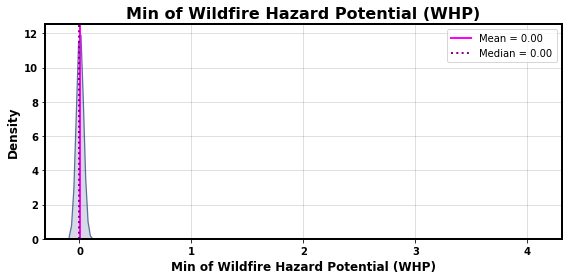

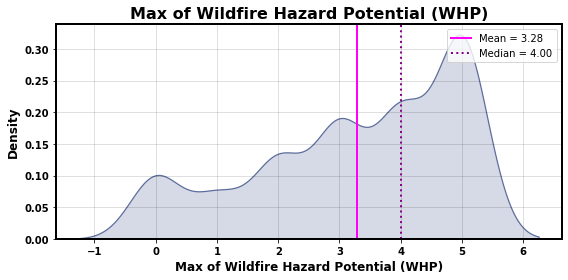

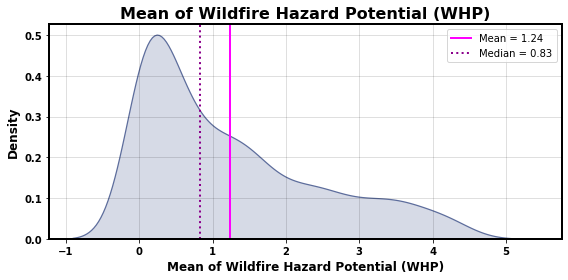

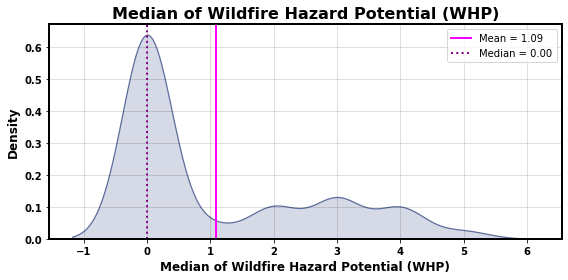

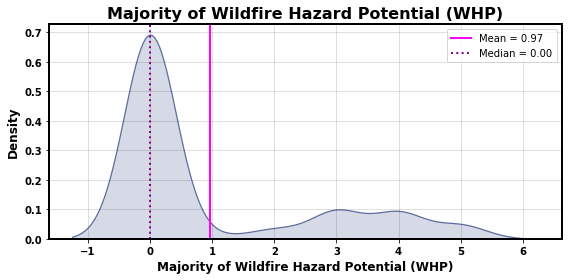

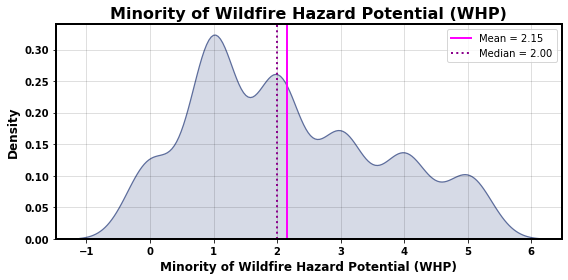

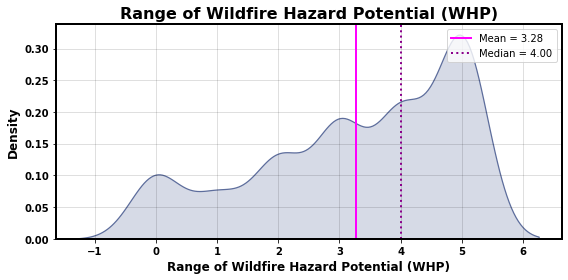

In [48]:
# Utilize function to display a KDE plot for all WHP-related variables
whp_cols = ['whp_min','whp_max','whp_mean','whp_median',
            'whp_majority','whp_minority','whp_range']

whp_titles = ['Min of Wildfire Hazard Potential (WHP)',
              'Max of Wildfire Hazard Potential (WHP)',
              'Mean of Wildfire Hazard Potential (WHP)',
              'Median of Wildfire Hazard Potential (WHP)',
              'Majority of Wildfire Hazard Potential (WHP)',
              'Minority of Wildfire Hazard Potential (WHP)',
              'Range of Wildfire Hazard Potential (WHP)']

for col in range(len(whp_cols)):
  kde_plot(eda_df, whp_cols[col],
          tit_lab=whp_titles[col], 
          fs=(8,4),
          x_lab=whp_titles[col])

####**WHP-related columns to keep**

- We will only keep the following metrics for WHP-derived metrics for next step of analysis
  - `whp_median`
  - `whp_mean`
  - `whp_minority`
- These metrics have unique types of data distribution and will be likely to address different aspects in the data better than the rest

In [78]:
# create a list to store columns names to keep
cols_keep = ['whp_median','whp_mean','whp_minority']
cols_keep

['whp_median', 'whp_mean', 'whp_minority']

###**2.2 Risk to Potential Structures (RPS) related variables**

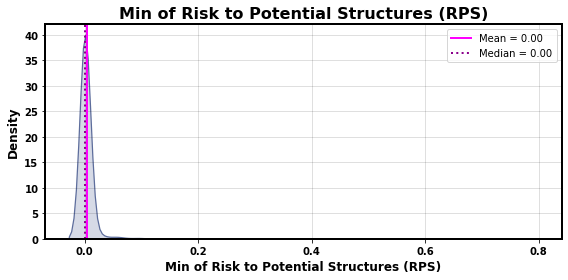

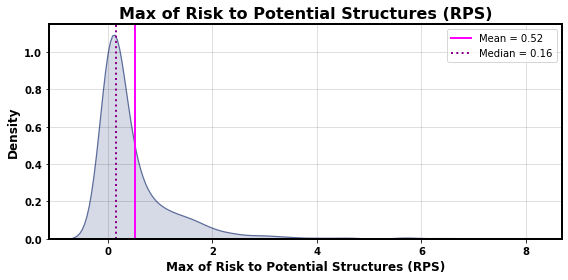

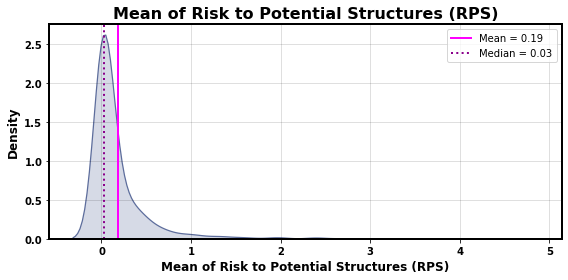

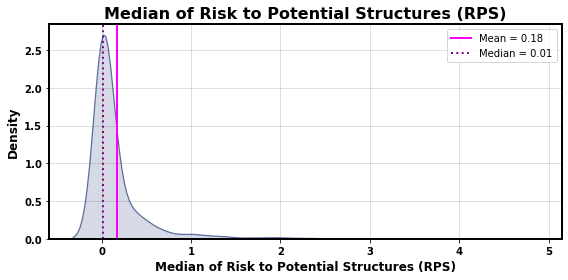

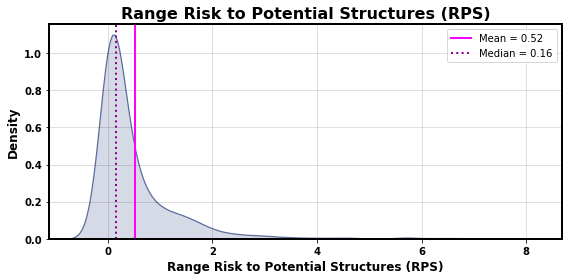

In [58]:
# Utilize function to display a KDE plot for all RPS-related variables
rps_cols = ['rps_min','rps_max','rps_mean','rps_median',
            'rps_range']

rps_titles = ['Min of Risk to Potential Structures (RPS)',
              'Max of Risk to Potential Structures (RPS)',
              'Mean of Risk to Potential Structures (RPS)',
              'Median of Risk to Potential Structures (RPS)',
              'Range Risk to Potential Structures (RPS)']

for col in range(len(rps_cols)):
  kde_plot(eda_df, rps_cols[col],
          tit_lab=rps_titles[col], 
          fs=(8,4),
          x_lab=rps_titles[col])

- Create box plots to identify outliers in RPS-derived variables

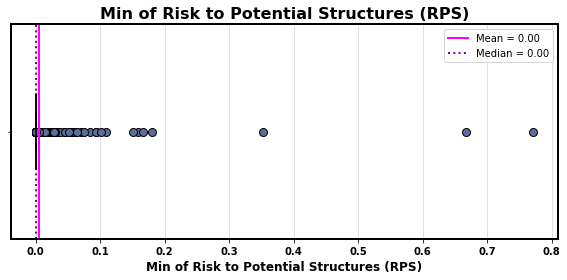

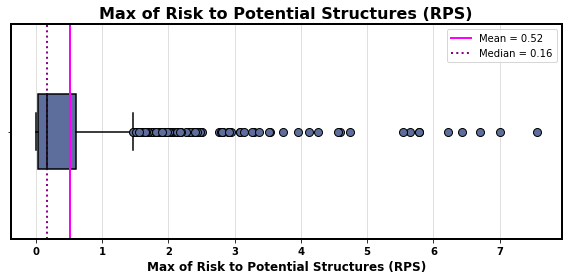

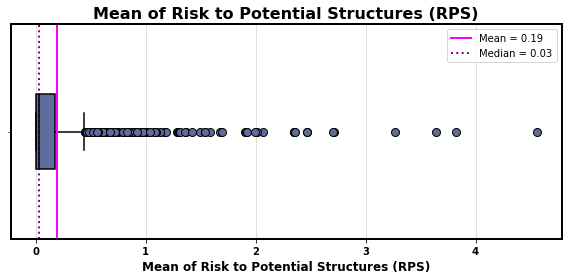

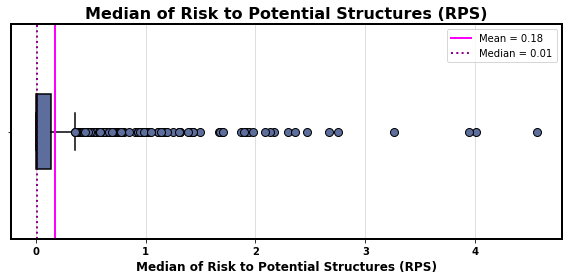

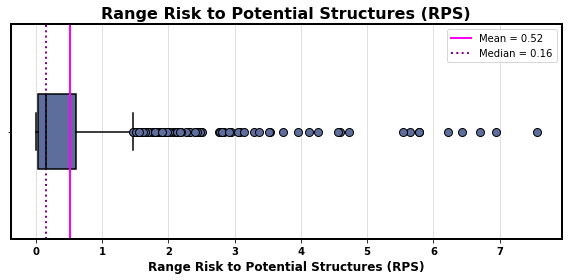

In [60]:
# create box plots to identify outliers in RPS-derived variables
# box_plot(eda_df, 'z_score',
#              tit_lab='Mann-Kendall Test', 
#              fs=(8,4),
#          x_lab = 'Coefficient')

for col in range(len(rps_cols)):
  box_plot(eda_df, rps_cols[col],
              tit_lab=rps_titles[col], 
              fs=(8,4),
          x_lab = rps_titles[col])

- We decide to keep the high-value outliers
  - These data points indicates a high risk of risk to potential structures
  - They are data of interest and should be included in the modeling to answer our research question

####**RPS-related columns to keep**

- We will only keep the following metrics for WHP-derived metrics for next step of analysis
  - `rps_min`
  - `rps_max`
  - `rps_median`
- These metrics have unique types of data distribution and will be likely to address different aspects in the data better than the rest

In [79]:
# add to the list for column names to keep
cols_keep = cols_keep + ['rps_min','rps_max','rps_median']
cols_keep

['whp_median', 'whp_mean', 'whp_minority', 'rps_min', 'rps_max', 'rps_median']

###**2.3 House affordability**

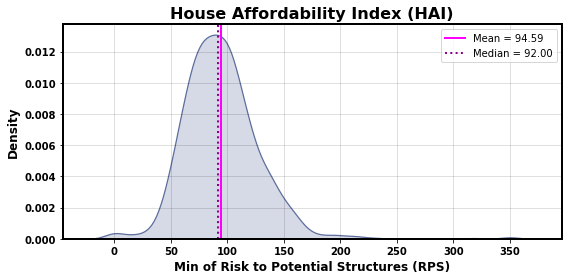

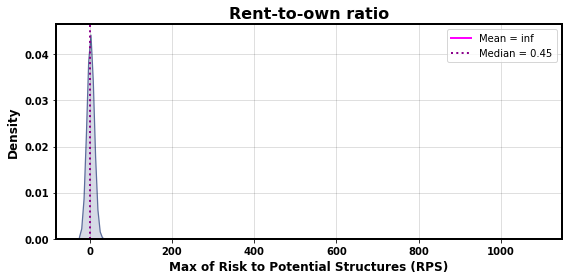

In [68]:
# Utilize function to display a KDE plot for all RPS-related variables
hai_cols = ['hai', 'rent_own_ratio']

hai_titles = ['House Affordability Index (HAI)','Rent-to-own ratio']

for col in range(len(hai_cols)):
  kde_plot(eda_df, hai_cols[col],
          tit_lab=hai_titles[col], 
          fs=(8,4),
          x_lab=rps_titles[col])

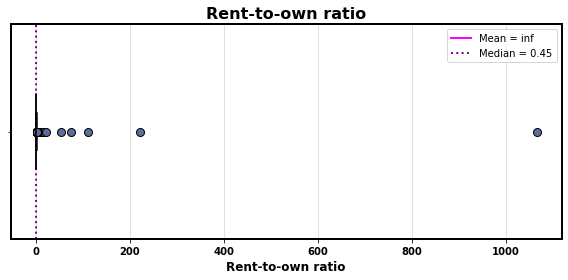

In [69]:
# further check the outliers in rent_own_ratio column
box_plot(eda_df, 'rent_own_ratio',
              tit_lab='Rent-to-own ratio', 
              fs=(8,4),
          x_lab = 'Rent-to-own ratio')

**Findings**
- There are a number of rows with `hai = 0`, indicating HAI is not available for this census tract
  - According to the [data description](https://www.arcgis.com/home/item.html?id=a1263c2dcdf2464bbb7906821038eb2f), this occurs in a predominantly rental market
  - **We will remove these rows for next steps of analysis**
  
- Rent-to-own ratio contains several high-value outliers
  - `rent_own_ratio = 200` indicates that residents who rent homes are two-times higher than residents who own homes, meaning a low house affordability
  - We will **remove `rent_own_ratio > 200`** to get rid of extremely unaffordable census tracts, that are very likely to locate next to the urban area with very low wildfire risk
  - These rows may also have an `hai = 0`

In [74]:
# check the type of WUI and the level of wildfire risk for rows with 
# hai == 0
eda_df[(eda_df.hai == 0)]

,geoid,county,trend,z_score,wui_class,owner_num,renter_num,hai,income_mortage_ratio,diversity_index,...,whp_mean,whp_majority,whp_minority,whp_median,rps_mean,rps_median,rps_min,rps_max,rps_range,rent_own_ratio
127,6001422800,Alameda County,increasing,3.219938,High_Dens_Interface,15,1654,0,0.0,72.0,...,0.000000,0,0,0,0.002025,0.000867,0.000006,0.009605,0.009599,110.267
237,6037980021,Los Angeles County,increasing,2.464815,Low_Dens_Interface,8,0,0,0.0,57.5,...,1.989796,3,5,2,0.171173,0.158700,0.000000,0.593152,0.593152,0.000
298,6059052518,Orange County,increasing,3.935480,High_Dens_Interface,4,4262,0,0.0,66.5,...,0.150000,0,1,0,0.005891,0.001697,0.000000,0.076385,0.076385,1065.500
640,6037190402,Los Angeles County,increasing,2.325511,High_Dens_Interface,6,1331,0,0.0,70.0,...,0.000000,0,0,0,0.000539,0.000433,0.000110,0.001437,0.001327,221.833
729,6075060100,San Francisco County,increasing,3.577709,Med_Dens_Interface,17,1258,0,0.0,47.5,...,0.719512,0,1,0,0.001996,0.000000,0.000000,0.043970,0.043970,74.000
850,6053014104,Monterey County,increasing,3.322698,Low_Dens_Interface,0,1,0,0.0,76.8,...,0.422222,0,2,0,0.007258,0.001668,0.000000,0.049315,0.049315,inf
997,6085511608,Santa Clara County,increasing,2.325511,Low_Dens_Interface,2,107,0,0.0,75.1,...,1.162162,0,4,1,0.020484,0.003120,0.000000,0.088328,0.088328,53.500


,geoid,county,trend,z_score,wui_class,owner_num,renter_num,hai,income_mortage_ratio,diversity_index,...,whp_mean,whp_majority,whp_minority,whp_median,rps_mean,rps_median,rps_min,rps_max,rps_range,rent_own_ratio
298,6059052518,Orange County,increasing,3.935480,High_Dens_Interface,4,4262,0,0.0,66.5,...,0.150000,0,1,0,0.005891,0.001697,0.00000,0.076385,0.076385,1065.500
640,6037190402,Los Angeles County,increasing,2.325511,High_Dens_Interface,6,1331,0,0.0,70.0,...,0.000000,0,0,0,0.000539,0.000433,0.00011,0.001437,0.001327,221.833
850,6053014104,Monterey County,increasing,3.322698,Low_Dens_Interface,0,1,0,0.0,76.8,...,0.422222,0,2,0,0.007258,0.001668,0.00000,0.049315,0.049315,inf


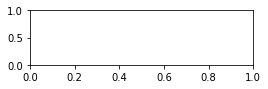

In [75]:
# check the type of WUI and the level of wildfire risk for rows with 
# rent_own_ratio > 200
eda_df[(eda_df.rent_own_ratio > 200)]

In [77]:
## remove rows with hai = 0
eda_df = eda_df[eda_df.hai > 0]

print(f'eda_df now has {eda_df[(eda_df.hai == 0)].shape[0]} rows with hai = 0')

eda_df now has 0 with hai = 0


####**House affordability columns to keep**

In [80]:
# add to col_keeps
cols_keep = cols_keep + ['hai','rent_own_ratio']
cols_keep

['whp_median',
 'whp_mean',
 'whp_minority',
 'rps_min',
 'rps_max',
 'rps_median',
 'hai',
 'rent_own_ratio']

###**2.4 Income-related metrics**

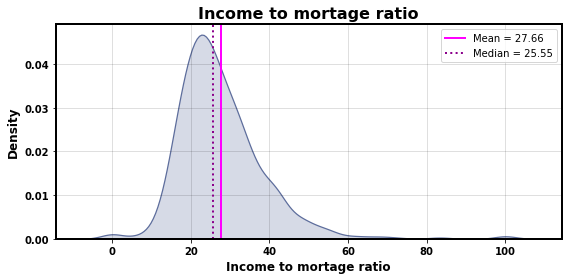

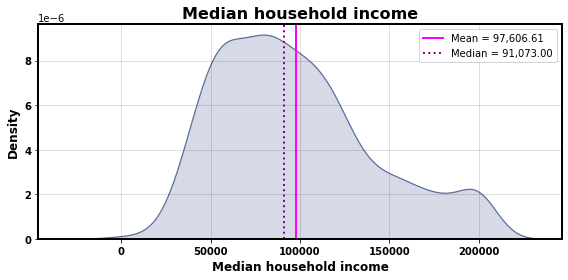

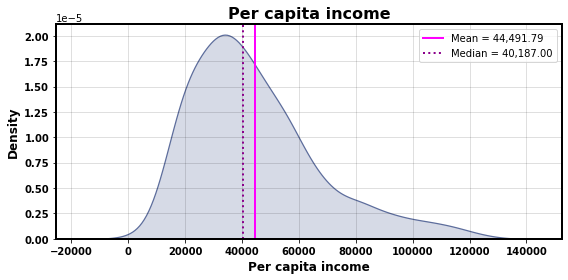

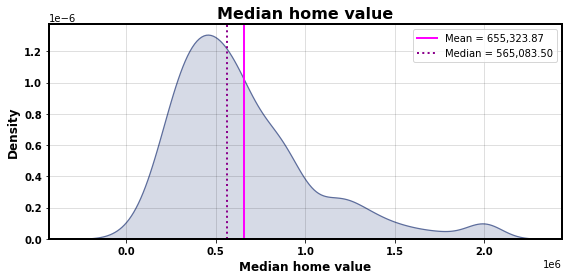

In [66]:
# Utilize function to display a KDE plot for all RPS-related variables
income_cols = ['income_mortage_ratio','med_house_income','per_capita_income',
               'med_home_value']

income_titles = ['Income to mortage ratio','Median household income',
                 'Per capita income','Median home value']

for col in range(len(income_cols)):
  kde_plot(eda_df, income_cols[col],
          tit_lab=income_titles[col], 
          fs=(8,4),
          x_lab=income_titles[col])

- Keep all the income-related metrics
  - They do not have overalapped (too similar) data distribution and address a unique aspect in the research question

####**Income-related columns to keep**

In [81]:
# add to the list for column names to keep
cols_keep = cols_keep + income_cols
cols_keep

['whp_median',
 'whp_mean',
 'whp_minority',
 'rps_min',
 'rps_max',
 'rps_median',
 'hai',
 'rent_own_ratio',
 'income_mortage_ratio',
 'med_house_income',
 'per_capita_income',
 'med_home_value']

###**2.5 Demographics columns**

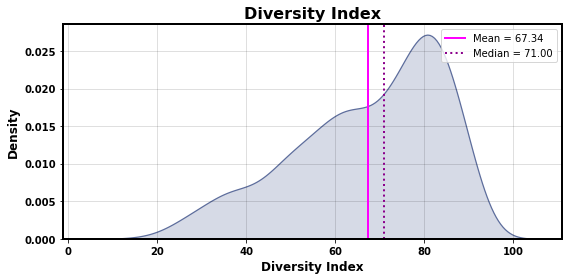

In [82]:
# Utilize function to display a KDE plot for selected variables
dem_cols = ['diversity_index']

dem_titles = ['Diversity Index']

for col in range(len(dem_cols)):
  kde_plot(eda_df, dem_cols[col],
          tit_lab=dem_titles[col], 
          fs=(8,4),
          x_lab=dem_titles[col])

####**Demographic columns to keep**

In [83]:
# add to the list for column names to keep
cols_keep = cols_keep + dem_cols
cols_keep

['whp_median',
 'whp_mean',
 'whp_minority',
 'rps_min',
 'rps_max',
 'rps_median',
 'hai',
 'rent_own_ratio',
 'income_mortage_ratio',
 'med_house_income',
 'per_capita_income',
 'med_home_value',
 'diversity_index']

###**2.6 Categorical columns**

In [84]:
# get index for selected cols
data_types = eda_df.dtypes
cat_cols = data_types[data_types=='object'].index
cat_cols

Index(['county', 'trend', 'wui_class'], dtype='object')